# Arizona Active Management Area Data 
***
#### Annual Supply and Demand
We are going to take a look at the **water use** and **water supply** by sector and source on an annual basis.

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import CSV's
We are using Pandas to reaad both csv files that include annual AMA water data, as well as the csv that includes the business term definitions associated with the water data. This will help give context for our EDA.

In [102]:
waterdata = pd.read_csv('ama-demand-supply-data/AMA_demand_supply_from_DW .csv')

In [103]:
waterterms = pd.read_csv('ama-demand-supply-data/AMA_demand_supply_business_terms.csv')

In [104]:
waterdata.head(5)

,YEAR,AMA,SECTOR,CATEGORY,PARENT WATER TYPE OR SECTOR,BUDGET ELEMENT,QUANTITY
0,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Residential Deliveries,563476
1,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Non-Residential Deliveries,304201
2,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Lost and Unaccounted for Water,234368
3,2021,PHOENIX AMA,Municipal,Demand,Municipal,Small Provider Deliveries,2185
4,2021,PHOENIX AMA,Municipal,Demand,Municipal,Urban Irrigation,105247


In [105]:
waterterms.head()

,Business_Term,BUSINESS_TERM_DESCRIPTION,Business_Term_Status
0,Annual Report Year,Calendar year during which annual water use wa...,S
1,Surface water,"A water type, Surface water is the waters of a...",S
2,Supply,The sources of water available for use by a ce...,S
3,Municipal,Municipal water use includes water delivered f...,S
4,Agricultural,Agricultural demand is composed of the use of ...,S


In [106]:
waterdata.shape

(7844, 7)

In [107]:
waterdata.isnull()

,YEAR,AMA,SECTOR,CATEGORY,PARENT WATER TYPE OR SECTOR,BUDGET ELEMENT,QUANTITY
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7839,False,False,False,False,True,False,False
7840,False,False,False,False,True,False,False
7841,False,False,False,False,True,False,False
7842,False,False,False,False,True,False,False


#### Rename Columns

In [108]:
waterdata = waterdata.rename(columns={'YEAR': 'year', 'AMA': 'ama', 'SECTOR':'sector', 'CATEGORY': 'category',
                                      'PARENT WATER TYPE OR SECTOR':'watertype_sector', 'BUDGET ELEMENT':'budget_element',
                                      'QUANTITY':'quantity'})

In [109]:
waterdata.head()

,year,ama,sector,category,watertype_sector,budget_element,quantity
0,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Residential Deliveries,563476
1,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Non-Residential Deliveries,304201
2,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Lost and Unaccounted for Water,234368
3,2021,PHOENIX AMA,Municipal,Demand,Municipal,Small Provider Deliveries,2185
4,2021,PHOENIX AMA,Municipal,Demand,Municipal,Urban Irrigation,105247


In [110]:
waterterms = waterterms.rename(columns={'Business_Term':'business_term', 'BUSINESS_TERM_DESCRIPTION': 'description', 'Business_Term_Status':'status'})

In [111]:
waterterms = waterterms.sort_values('business_term', ascending=True)

In [113]:
waterterms

,business_term,description,status
32,Active Management Area Exempt Well Population,Total annual population served by Exempt Wells...,S
33,Active Management Area Exempt Wells,Wells with a pump capacity equal to or less th...,S
61,Aeronautical Reconnaissance Coverage Geographi...,"A family of client software, server software, ...",S
4,Agricultural,Agricultural demand is composed of the use of ...,S
54,Agricultural Exception Users,Surface water right holders in Chino Valley Ir...,S
...,...,...,...
27,Urban Irrigation,Untreated water supplied by a municipal provid...,S
67,Water Management Assistance Program,Intended to provide financial and technical re...,S
21,Water withdrawn from wells,"""Water withdrawn from wells"" as a water type r...",S
22,Weighted Exchange Effluent,An accounting mechanism for effluent water exc...,S


### Phoenix AMA Demand and Supply

#### Supply for all Sectors for 2021

In [114]:
waterdata.head()

,year,ama,sector,category,watertype_sector,budget_element,quantity
0,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Residential Deliveries,563476
1,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Non-Residential Deliveries,304201
2,2021,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Lost and Unaccounted for Water,234368
3,2021,PHOENIX AMA,Municipal,Demand,Municipal,Small Provider Deliveries,2185
4,2021,PHOENIX AMA,Municipal,Demand,Municipal,Urban Irrigation,105247


In [116]:
waterdata_phxsup = waterdata[(waterdata['year'] == 2021) & (waterdata['ama'] == 'PHOENIX AMA') & (waterdata['category'] == 'Supply')]

In [117]:
waterdata_phxsup

,year,ama,sector,category,watertype_sector,budget_element,quantity
11,2021,PHOENIX AMA,Municipal,Supply,NaN,CAP GSF,0
12,2021,PHOENIX AMA,Municipal,Supply,Groundwater,Groundwater,290049
13,2021,PHOENIX AMA,Municipal,Supply,AWS Groundwater Accounting,Excess,32100
14,2021,PHOENIX AMA,Municipal,Supply,Groundwater,Remediation water,4229
15,2021,PHOENIX AMA,Municipal,Supply,Surface Water,Surface Water,329324
16,2021,PHOENIX AMA,Municipal,Supply,CAP,CAP,328899
17,2021,PHOENIX AMA,Municipal,Supply,Effluent,Effluent,141458
18,2021,PHOENIX AMA,Municipal,Supply,Effluent,Weighted Exchange Effluent,33793
19,2021,PHOENIX AMA,Municipal,Supply,Spill,Spill,8446
20,2021,PHOENIX AMA,Municipal,Supply,CAP,Recovered CAP,49272


/Users/markrubin/miniconda3/envs/thewaterboy-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markrubin/miniconda3/envs/thewaterboy-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/markrubin/miniconda3/envs/thewaterboy-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


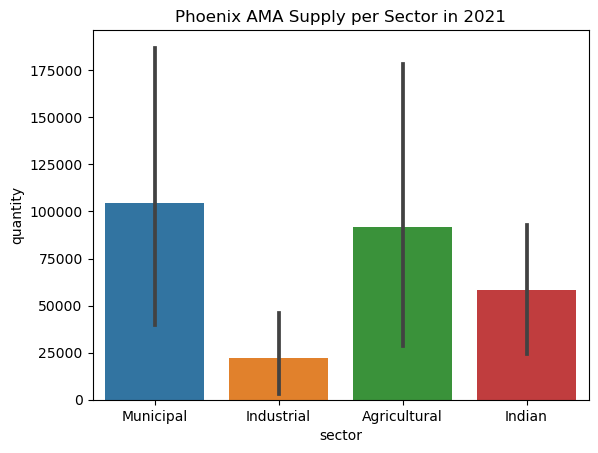

In [123]:
sns.barplot(data=waterdata_phxsup, x='sector', y='quantity')
plt.title('Phoenix AMA Supply per Sector in 2021')
plt.show()

#### Next we will separate each sector by the parent water type and change the chart to a stacked object chart.

Looking at the categories and business terms chart, we have four total categories of types.
1. Surface Water = Surface water + Spill
2. Colorado River = CAP
3. Ground water = Groundwater
4. Effluent = Effluent